In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [14]:
# from skylark.benchmark.utils import provision, split_list


# def count_pairs(n):
#     pairs = []
#     for i in range(n):
#         for j in range(n):
#             if i != j:
#                 pairs.append((i, j))
#     num_groups = len(split_list(pairs))
#     return num_groups


# x = range(1, 90)
# y1 = [i ** 2 for i in x]
# y2 = [count_pairs(i) for i in x]

# # plot y1 and y2 against x (white background)
# fig, ax = plt.subplots(figsize=(10, 6))
# df = pd.DataFrame({"x": x, "y1": y1, "y2": y2})
# df.plot(x="x", y=["y1", "y2"], ax=ax)

In [15]:
fname = "/home/ubuntu/skylark/data/logs/throughput_grid/2022.01.17_08.58_vainly-self-supporting-oro-spillway_5s_128c/throughput.csv"
df = pd.read_csv(fname)
df

,src_region,src_tier,src_instance_class,dst_region,dst_tier,dst_instance_class,iperf3_connections,iperf3_runtime,tag,stdout_path,stderr_path,throughput_sent,throughput_recieved,cpu_utilization,success
0,aws:eu-south-1,PREMIUM,m5.8xlarge,gcp:europe-west6-a,PREMIUM,n2-standard-32,128,5,aws:eu-south-1:PREMIUM_gcp:europe-west6-a:PREMIUM,/home/ubuntu/skylark/data/logs/throughput_grid...,/home/ubuntu/skylark/data/logs/throughput_grid...,4.971794e+09,4.774205e+09,13.606795,True
1,aws:us-west-2,PREMIUM,m5.8xlarge,azure:uksouth,PREMIUM,Standard_D32_v4,128,5,aws:us-west-2:PREMIUM_azure:uksouth:PREMIUM,/home/ubuntu/skylark/data/logs/throughput_grid...,/home/ubuntu/skylark/data/logs/throughput_grid...,4.420184e+09,3.766669e+09,3.057994,True
2,azure:northcentralus,PREMIUM,Standard_D32_v4,gcp:australia-southeast2-a,PREMIUM,n2-standard-32,128,5,azure:northcentralus:PREMIUM_gcp:australia-sou...,/home/ubuntu/skylark/data/logs/throughput_grid...,/home/ubuntu/skylark/data/logs/throughput_grid...,4.216118e+09,3.887627e+09,3.515970,True
3,aws:eu-south-1,PREMIUM,m5.8xlarge,azure:uksouth,PREMIUM,Standard_D32_v4,128,5,aws:eu-south-1:PREMIUM_azure:uksouth:PREMIUM,/home/ubuntu/skylark/data/logs/throughput_grid...,/home/ubuntu/skylark/data/logs/throughput_grid...,5.070947e+09,4.687085e+09,8.627373,True
4,gcp:europe-west6-a,PREMIUM,n2-standard-32,aws:us-west-2,PREMIUM,m5.8xlarge,128,5,gcp:europe-west6-a:PREMIUM_aws:us-west-2:PREMIUM,/home/ubuntu/skylark/data/logs/throughput_grid...,/home/ubuntu/skylark/data/logs/throughput_grid...,2.443600e+09,2.410540e+09,18.808889,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,aws:us-west-2,PREMIUM,m5.8xlarge,gcp:australia-southeast2-a,PREMIUM,n2-standard-32,1,5,aws:us-west-2:PREMIUM_gcp:australia-southeast2...,/home/ubuntu/skylark/data/logs/throughput_grid...,/home/ubuntu/skylark/data/logs/throughput_grid...,1.089067e+08,1.084774e+08,6.081526,True
236,aws:eu-south-1,PREMIUM,m5.8xlarge,azure:northcentralus,PREMIUM,Standard_D32_v4,1,5,aws:eu-south-1:PREMIUM_azure:northcentralus:PR...,/home/ubuntu/skylark/data/logs/throughput_grid...,/home/ubuntu/skylark/data/logs/throughput_grid...,1.714826e+08,1.675395e+08,4.732755,True
237,aws:us-west-2,PREMIUM,m5.8xlarge,gcp:europe-west6-a,PREMIUM,n2-standard-32,1,5,aws:us-west-2:PREMIUM_gcp:europe-west6-a:PREMIUM,/home/ubuntu/skylark/data/logs/throughput_grid...,/home/ubuntu/skylark/data/logs/throughput_grid...,1.096871e+08,1.084270e+08,6.094878,True
238,azure:uksouth,PREMIUM,Standard_D32_v4,aws:eu-south-1,PREMIUM,m5.8xlarge,1,5,azure:uksouth:PREMIUM_aws:eu-south-1:PREMIUM,/home/ubuntu/skylark/data/logs/throughput_grid...,/home/ubuntu/skylark/data/logs/throughput_grid...,5.124880e+08,5.081933e+08,2.445026,True


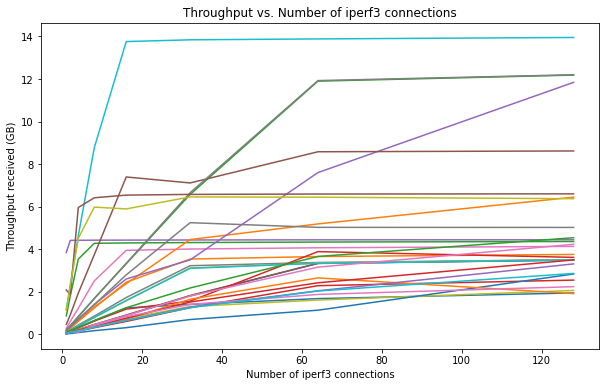

In [16]:
# plot line plot of iperf3_connections versus throughput_recieved
# one bar per src-dst pair
fig, ax = plt.subplots(figsize=(10, 6))
for key, group_df in df.groupby(["src_region", "dst_region"]):
    label = f"{key[0]} => {key[1]}"
    group_df["throughput_recieved"] = group_df["throughput_recieved"] / 1024 / 1024 / 1024
    group_df.plot(x="iperf3_connections", y="throughput_recieved", kind="line", label=key, ax=ax)
fig.patch.set_facecolor("white")

# hide legend
ax.legend().set_visible(False)
ax.set_xlabel("Number of iperf3 connections")
ax.set_ylabel("Throughput received (GB)")
ax.set_title("Throughput vs. Number of iperf3 connections")

fig.savefig(Path(fname).parent / "throughput_vs_iperf3_connections.png")